哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
data_AA = pd.read_csv('./A_lvr_land_A.csv')
data_BA = pd.read_csv('./B_lvr_land_A.csv')
data_EA = pd.read_csv('./E_lvr_land_A.csv')
data_FA = pd.read_csv('./F_lvr_land_A.csv')

C:\Users\vincentLee1231995\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#data_AA.info()

In [4]:
#data_BA.info()

In [5]:
#data_EA.info()

In [6]:
#data_FA.info()

In [7]:
print(len(data_AA))
print(len(data_BA))
print(len(data_EA))
print(len(data_FA))

8842
16685
14134
19819


In [8]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
data_AA = data_AA.iloc[1:len(data_AA)]
data_BA = data_BA.iloc[1:len(data_BA)]
data_EA = data_EA.iloc[1:len(data_EA)]
data_FA = data_FA.iloc[1:len(data_FA)]

print(len(data_AA))
print(len(data_BA))
print(len(data_EA))
print(len(data_FA))

8841
16684
14133
19818


In [9]:
8841+16684+14133+19818

59476

In [10]:
data_AA_copy1 = data_AA.copy()

In [11]:
data_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 1 to 8841
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           8841 non-null   object 
 1   交易標的           8841 non-null   object 
 2   土地區段位置建物區段門牌   8841 non-null   object 
 3   土地移轉總面積平方公尺    8841 non-null   object 
 4   都市土地使用分區       8750 non-null   object 
 5   非都市土地使用分區      0 non-null      object 
 6   非都市土地使用編定      0 non-null      object 
 7   交易年月日          8841 non-null   object 
 8   交易筆棟數          8841 non-null   object 
 9   移轉層次           7764 non-null   object 
 10  總樓層數           7755 non-null   object 
 11  建物型態           8841 non-null   object 
 12  主要用途           7588 non-null   object 
 13  主要建材           7763 non-null   object 
 14  建築完成年月         7321 non-null   object 
 15  建物移轉總面積平方公尺    8841 non-null   object 
 16  建物現況格局-房       8841 non-null   object 
 17  建物現況格局-廳       8841 non-null   object 
 18  建物現況格局-衛

In [12]:
#data_AA.head()

In [13]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
data_AA.loc[:,'city'] = 'Taipei'

In [14]:
data_AA

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,文山區,房地(土地+建物),興隆路三段61~90號,15.78,其他,NaN,NaN,1090712,土地2建物1車位0,十層，電梯樓梯間,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPPNMLSJRHPFFAA48DA,35.33,0.00,0.00,有,Taipei
8838,文山區,房地(土地+建物),仙岩路16巷31~60號,10.57,其他,NaN,NaN,1090815,土地1建物1車位0,三層,...,NaN,0.0,0,NaN,RPQNMLSJRHPFFAA58DA,17.82,2.88,0.00,有,Taipei
8839,文山區,房地(土地+建物),興隆路三段255巷1~30號,13.78,其他,NaN,NaN,1090622,土地3建物1車位0,二層,...,NaN,0.0,0,獨立產權公設未包含建物棟數內其他增建;,RPRNMLSJRHPFFAA68DA,20.20,5.22,0.01,有,Taipei
8840,文山區,房地(土地+建物),興隆路三段207巷18弄1~30號,24.12,其他,NaN,NaN,1090626,土地1建物1車位0,三層,...,NaN,0.0,0,陽台外推;,RPVNMLRJRHPFFAA98DA,67.47,0.00,14.11,無,Taipei


In [15]:
data_BA.loc[:,'city'] = 'New_Taipei'
data_EA.loc[:,'city'] = 'Taichung'
data_FA.loc[:,'city'] = 'Kaohsiung'

In [102]:
#4. 將以上四份資料運用pd.concat()串接
data_combined = pd.concat([data_AA, data_BA, data_EA, data_FA], ignore_index=True)
data_combined.info()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59476 entries, 0 to 59475
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           59476 non-null  object 
 1   交易標的           59476 non-null  object 
 2   土地區段位置建物區段門牌   59476 non-null  object 
 3   土地移轉總面積平方公尺    59476 non-null  object 
 4   都市土地使用分區       54097 non-null  object 
 5   非都市土地使用分區      4306 non-null   object 
 6   非都市土地使用編定      4302 non-null   object 
 7   交易年月日          59476 non-null  object 
 8   交易筆棟數          59476 non-null  object 
 9   移轉層次           49724 non-null  object 
 10  總樓層數           49664 non-null  object 
 11  建物型態           59476 non-null  object 
 12  主要用途           47889 non-null  object 
 13  主要建材           49680 non-null  object 
 14  建築完成年月         48690 non-null  object 
 15  建物移轉總面積平方公尺    59476 non-null  object 
 16  建物現況格局-房       59476 non-null  object 
 17  建物現況格局-廳       59476 non-null  object 
 18  建物現況格局

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [133]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [135]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
data = data_combined.rename(columns = columns_mapping)
#data.head()
data.columns

Index(['towns', 'transaction_sign', 'house_number', 'land_area_square_meter',
       'use_zoning', 'land_use_district', 'land_use', 'tx_dt',
       'transaction_pen_number', 'shifting_level', 'total_floor_number',
       'building_state', 'main_use', 'main_materials', 'complete_date',
       'building_area_square_meter', 'room_number', 'hall_number',
       'health_number', 'compartmented_number', 'manages', 'total_price',
       'unit_price', 'berth_category', 'berth_area_square_meter',
       'berth_price', 'note', 'serial_number', 'main_building_area',
       'auxiliary_building_area', 'balcony_area', 'elevator', 'city'],
      dtype='object')

In [142]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料
#   並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())

data = data[(data['main_use']=='住家用') & (data['use_zoning']=='住')]

#print(data_filtered['main_use'].head())
#print(data_filtered['use_zoning'].head())

analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']

data = data[analysis_columns].dropna()

In [146]:
data.isna().sum()

city                          0
towns                         0
main_use                      0
use_zoning                    0
total_price                   0
building_area_square_meter    0
main_building_area            0
tx_dt                         0
unit_price                    0
room_number                   0
hall_number                   0
health_number                 0
dtype: int64

In [147]:
data_copy1 = data.copy()

In [148]:
data.dtypes

city                           object
towns                          object
main_use                       object
use_zoning                     object
total_price                    object
building_area_square_meter     object
main_building_area            float64
tx_dt                          object
unit_price                     object
room_number                    object
hall_number                    object
health_number                  object
dtype: object

In [149]:
#data['total_price'].dtypes
#data['total_price'].astype('int')

In [150]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換

columns_type = {'total_price': 'int',
                'unit_price':'float',
                'building_area_square_meter':'float',
                'main_building_area': 'float',
                'room_number': 'int',
                'hall_number': 'int',
                'health_number': 'int'}

data = data.astype(columns_type)
data.dtypes

# https://www.delftstack.com/zh-tw/api/python-pandas/pandas-dataframe-dataframe.astype-function/

city                           object
towns                          object
main_use                       object
use_zoning                     object
total_price                     int32
building_area_square_meter    float64
main_building_area            float64
tx_dt                          object
unit_price                    float64
room_number                     int32
hall_number                     int32
health_number                   int32
dtype: object

In [151]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份

In [152]:
data_copy2 = data.copy()

In [153]:
data['tx_dt'].head()

0    1090406
1    1090317
4    1090328
6    1090417
7    1090417
Name: tx_dt, dtype: object

In [154]:
data['tx_dt'].isna().sum()

0

In [155]:
data['tx_dt_year'] = data['tx_dt'].astype('string')
#data['tx_dt_year'] 

base = []
for i in data['tx_dt_year']:
    ch = i[:3]
    base.append(ch)
  
print(len(base))

data['tx_dt_year'] = base
data['tx_dt_year']

7802


0        109
1        109
4        109
6        109
7        109
        ... 
48924    109
49200    109
49735    109
49799    109
51169    109
Name: tx_dt_year, Length: 7802, dtype: object

In [156]:
data_copy3 = data.copy()

In [157]:
#     1.交易年月日(tx_dt_year)，限制在109年

data = data[data['tx_dt_year'] == '109']
print(len(data))

#     2.建物現況格局-房(room_number)，限制在1到5間
data = data[(data['room_number']>=1) & (data['room_number']<=5)]
print(len(data))

#     3.建物現況格局-廳(hall_number)，限制在1到2廳
data = data[(data['hall_number']>=1) & (data['hall_number']<=2)]
print(len(data))


7689
7317
6894


In [158]:
#     4.最後運用.reset_index()重新定義索引
data.reset_index()

,index,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,4,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,6,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,7,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,48796,Kaohsiung,新店區,住家用,住,10500000,112.33,93.18,1090516,93475.0,3,2,2,109
6890,48872,Kaohsiung,蘆洲區,住家用,住,9200000,92.14,86.55,1090529,99848.0,3,2,1,109
6891,49735,Kaohsiung,三重區,住家用,住,6000000,67.00,67.00,1090522,89552.0,1,1,1,109
6892,49799,Kaohsiung,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924.0,3,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [159]:
#先備分一下
data_copy4 = data.copy()

In [160]:
data.columns

Index(['city', 'towns', 'main_use', 'use_zoning', 'total_price',
       'building_area_square_meter', 'main_building_area', 'tx_dt',
       'unit_price', 'room_number', 'hall_number', 'health_number',
       'tx_dt_year'],
      dtype='object')

In [162]:
columns_mapping

{'鄉鎮市區': 'towns',
 '交易標的': 'transaction_sign',
 '土地區段位置建物區段門牌': 'house_number',
 '土地移轉總面積平方公尺': 'land_area_square_meter',
 '都市土地使用分區': 'use_zoning',
 '非都市土地使用分區': 'land_use_district',
 '非都市土地使用編定': 'land_use',
 '交易年月日': 'tx_dt',
 '交易筆棟數': 'transaction_pen_number',
 '移轉層次': 'shifting_level',
 '總樓層數': 'total_floor_number',
 '建物型態': 'building_state',
 '主要用途': 'main_use',
 '主要建材': 'main_materials',
 '建築完成年月': 'complete_date',
 '建物移轉總面積平方公尺': 'building_area_square_meter',
 '建物現況格局-房': 'room_number',
 '建物現況格局-廳': 'hall_number',
 '建物現況格局-衛': 'health_number',
 '建物現況格局-隔間': 'compartmented_number',
 '有無管理組織': 'manages',
 '總價元': 'total_price',
 '單價元平方公尺': 'unit_price',
 '車位類別': 'berth_category',
 '車位移轉總面積(平方公尺)': 'berth_area_square_meter',
 '車位總價元': 'berth_price',
 '備註': 'note',
 '編號': 'serial_number',
 '主建物面積': 'main_building_area',
 '附屬建物面積': 'auxiliary_building_area',
 '陽台面積': 'balcony_area',
 '電梯': 'elevator'}

In [164]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
data['building_area_square_feet'] = data['building_area_square_meter']*0.3025

# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
data['main_building_area_square_feet'] = data['main_building_area']*0.3025

# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
data['unit_price_square_feet'] = data['unit_price']/0.3025

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 51169
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            6894 non-null   object 
 1   towns                           6894 non-null   object 
 2   main_use                        6894 non-null   object 
 3   use_zoning                      6894 non-null   object 
 4   total_price                     6894 non-null   int32  
 5   building_area_square_meter      6894 non-null   float64
 6   main_building_area              6894 non-null   float64
 7   tx_dt                           6894 non-null   object 
 8   unit_price                      6894 non-null   float64
 9   room_number                     6894 non-null   int32  
 10  hall_number                     6894 non-null   int32  
 11  health_number                   6894 non-null   int32  
 12  tx_dt_year                      6

In [166]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?

data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


In [ ]:
# 移除後再用.describe()觀察是否還有奇怪的資料?



# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [175]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子

# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

data_alice1 = data[data['city']=='Taipei']
price_corr = data_alice1.corr()

price_corr

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
total_price,1.000000,0.864785,0.710934,0.581838,0.324625,0.269678,0.597425,0.864785,0.710934,0.581838
building_area_square_meter,0.864785,1.000000,0.837325,0.221264,0.484097,0.378380,0.696571,1.000000,0.837325,0.221264
main_building_area,0.710934,0.837325,1.000000,0.117151,0.629989,0.463068,0.655927,0.837325,1.000000,0.117151
unit_price,0.581838,0.221264,0.117151,1.000000,-0.100902,0.003585,0.126603,0.221264,0.117151,1.000000
room_number,0.324625,0.484097,0.629989,-0.100902,1.000000,0.509673,0.544779,0.484097,0.629989,-0.100902
hall_number,0.269678,0.378380,0.463068,0.003585,0.509673,1.000000,0.405766,0.378380,0.463068,0.003585
health_number,0.597425,0.696571,0.655927,0.126603,0.544779,0.405766,1.000000,0.696571,0.655927,0.126603
building_area_square_feet,0.864785,1.000000,0.837325,0.221264,0.484097,0.378380,0.696571,1.000000,0.837325,0.221264
main_building_area_square_feet,0.710934,0.837325,1.000000,0.117151,0.629989,0.463068,0.655927,0.837325,1.000000,0.117151
unit_price_square_feet,0.581838,0.221264,0.117151,1.000000,-0.100902,0.003585,0.126603,0.221264,0.117151,1.000000


In [176]:
import numpy as np

price_mask = np.zeros_like(price_corr, dtype=np.bool)   #相關係數非0者繪製熱力圖
# https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html

price_mask

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [179]:
price_mask[np.triu_indices_from(price_mask)] = True   #繪製下三角形的熱力圖
# https://numpy.org/devdocs/reference/generated/numpy.triu_indices_from.html

price_mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

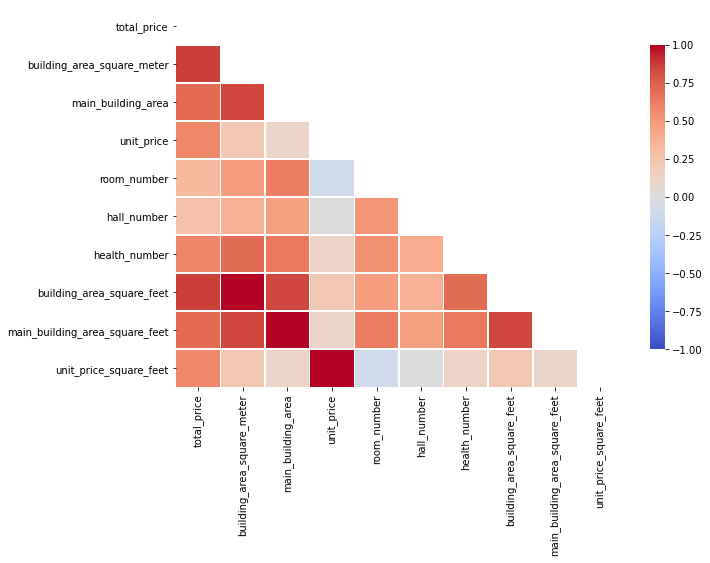

In [186]:
fig, ax = plt.subplots(figsize=(10, 7))

pl = sns.heatmap(price_corr,
                 mask=price_mask,
                 cmap= "coolwarm",
                 vmax=1.0, vmin=-1.0, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.8})

plt.show()

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區